# Machine Learning Project

## Introduction

In this assignment, I will be using the [bank marketing dataset](https://archive.ics.uci.edu/dataset/222/) from the University of California, Irvine machine learning repository to predict the outcome of whetever or not a client will subscribe to a term deposit at the bank. I will be using three models to assess how good they are at classifying the outcome and selecting a final model to possibly deploy later.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler

bank_marketing = pd.read_csv('data/raw/bank-additional-full.csv', sep=";")

In [2]:
bank_marketing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Preprocessing

I first began my preprocessing by cleaning the dataset of unknown values by dropping the rows with unknown values.

In [3]:
# Drop all rows with an unknown value
no_unknowns = bank_marketing[
    (bank_marketing['job'] != 'unknown') &
    (bank_marketing['marital'] != 'unknown') &
    (bank_marketing['education'] != 'unknown') &
    (bank_marketing['default'] != 'unknown') &
    (bank_marketing['housing'] != 'unknown') &
    (bank_marketing['loan'] != 'unknown')
].reset_index(drop=True)

no_unknowns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Then, I dropped the duration column from the dataframe as the original authors of the dataset recommended to do so as the duration of a call is not known before the call happens and the target variable is already known after a call occurs, resulting in data leakage.

In [4]:
no_unknowns = no_unknowns.drop(columns=['duration'])

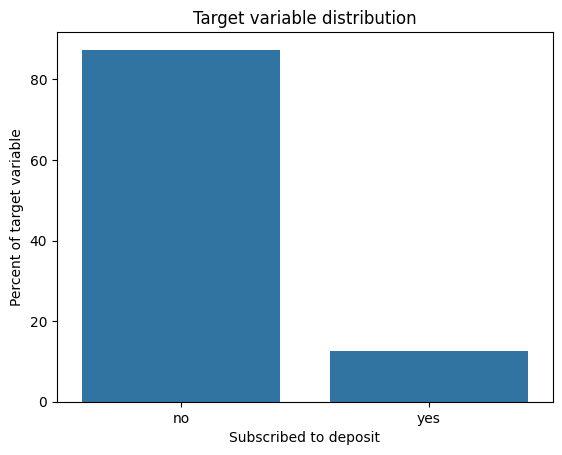

In [66]:
graph = sns.countplot(data=no_unknowns, x='y', stat='percent');
graph.set_title('Target variable distribution');
graph.set_xlabel('Subscribed to deposit');
graph.set_ylabel('Percent of target variable');

Figure 1

In [6]:
no_unknowns['y'].value_counts()

y
no     26629
yes     3859
Name: count, dtype: int64

Figure 1 shows that the target variable is heavily imbalanced. This means that measures should be taken to balance the training set of the dataset to around 50-50 between each category to make it more predictive of the result on the test set.

I then encoded the features in the dataset by encoding it ordinally along with encoding the target variable with an OrdinalEncoder and a LabelEncoder, respectively. Additionally, I manually encoded some features.

In [7]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [8]:
days = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

months = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

married = {
    'divorced': 0,
    'single': 1,
    'married': 2
}

poutcome = {
    'nonexistent': -1,
    'failure': 0,
    'success': 1
}

In [9]:
no_unknowns = no_unknowns.replace(days).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(months).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(married).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(poutcome).infer_objects(copy=False)

C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_20276\3774457650.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  no_unknowns = no_unknowns.replace(days).infer_objects(copy=False)
C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_20276\3774457650.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  no_unknowns = no_unknowns.replace(months).infer_objects(copy=False)
C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_20276\3774457650.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [10]:
no_unknowns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,2,basic.4y,no,no,no,telephone,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,2,high.school,no,yes,no,telephone,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,2,basic.6y,no,no,no,telephone,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,2,high.school,no,no,yes,telephone,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,2,professional.course,no,no,no,telephone,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,2,professional.course,no,yes,no,cellular,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,2,professional.course,no,no,no,cellular,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,2,university.degree,no,yes,no,cellular,11,4,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,2,professional.course,no,no,no,cellular,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
numeric_only = no_unknowns.select_dtypes(include=['number'])
numeric_only

,age,marital,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
1,37,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
2,40,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
3,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
4,59,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30484,46,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30485,56,2,11,4,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30486,44,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6


I performed a little bit of feature engineering by creating a previously contacted column from the pdays column to reflect if the client was previously contacted or not.

In [17]:
pdays = numeric_only['pdays']

previously_contacted = []

for val in pdays:
    if val == 999:
        previously_contacted.append(False)
    else:
        previously_contacted.append(True)

numeric_only['previously_contacted'] = previously_contacted
numeric_only

,age,marital,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previously_contacted
0,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False
1,37,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False
2,40,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False
3,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False
4,59,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False
30484,46,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False
30485,56,2,11,4,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False
30486,44,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False


In [18]:
object_only = no_unknowns.select_dtypes(include=['object']).drop(columns=['y'])
y = no_unknowns['y']
object_only

,job,education,default,housing,loan,contact
0,housemaid,basic.4y,no,no,no,telephone
1,services,high.school,no,yes,no,telephone
2,admin.,basic.6y,no,no,no,telephone
3,services,high.school,no,no,yes,telephone
4,admin.,professional.course,no,no,no,telephone
...,...,...,...,...,...,...
30483,retired,professional.course,no,yes,no,cellular
30484,blue-collar,professional.course,no,no,no,cellular
30485,retired,university.degree,no,yes,no,cellular
30486,technician,professional.course,no,no,no,cellular


In [19]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
encoded_df = pd.DataFrame()
encoded_df[object_only.columns] = oe.fit_transform(object_only)
encoded_df

,job,education,default,housing,loan,contact
0,3.0,0.0,0.0,0.0,0.0,1.0
1,7.0,3.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,7.0,3.0,0.0,0.0,1.0,1.0
4,0.0,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
30483,5.0,5.0,0.0,1.0,0.0,0.0
30484,1.0,5.0,0.0,0.0,0.0,0.0
30485,5.0,6.0,0.0,1.0,0.0,0.0
30486,9.0,5.0,0.0,0.0,0.0,0.0


In [21]:
y

array([0, 0, 0, ..., 0, 1, 0])

I then joined together the numeric data and the encoded data together to create my features dataframe for the ML models.

In [22]:
X = numeric_only.join(encoded_df)
X

,age,marital,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previously_contacted,job,education,default,housing,loan,contact
0,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False,3.0,0.0,0.0,0.0,0.0,1.0
1,37,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False,7.0,3.0,0.0,1.0,0.0,1.0
2,40,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False,0.0,1.0,0.0,0.0,0.0,1.0
3,56,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False,7.0,3.0,0.0,0.0,1.0,1.0
4,59,2,5,0,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,False,0.0,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False,5.0,5.0,0.0,1.0,0.0,0.0
30484,46,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False,1.0,5.0,0.0,0.0,0.0,0.0
30485,56,2,11,4,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False,5.0,6.0,0.0,1.0,0.0,0.0
30486,44,2,11,4,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,False,9.0,5.0,0.0,0.0,0.0,0.0


In [23]:
X.to_csv('data/cleaned_data.csv', index=False); # Save cleaned dataframe to CSV file

## Machine Learning

In [24]:
random_state = 42
cv = 5

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=random_state)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=random_state)

Before presenting the models, I randomly oversampled the training data in order to improve each model's performance compared to training the model on the original, unbalanced dataset as it is heavily imbalanced, resulting in distorted performances of an ML model.

In [26]:
ros = RandomOverSampler(random_state=random_state)
train_X_os, train_y_os = ros.fit_resample(train_X, train_y)

In [27]:
pd.Series(train_y_os).value_counts()

0    17038
1    17038
Name: count, dtype: int64

### Candidate models

For my models, I chose a decision tree classifier, a random forest classifier, and a K-neighbors classifier. I will then compare each model after going through a few evaluations to find the best performing model on the dataset based on the F1 score of the model. I chose the F1 score because it balances between precision and recall and it is suitable for imbalanced datasets such as the bank marketing dataset.

In [28]:
tree = DecisionTreeClassifier(random_state=random_state)
forest = RandomForestClassifier(random_state=random_state, oob_score=f1_score)
neighbors = KNeighborsClassifier()

### Validation set evaluation before hyperparameter tuning

My first evaluation will be evaluating the original models before tuning each model's hyperparameters to provide as a baseline for each model. I trained the data on the oversampled training data and evaluated each model on an unmodified validation dataset.

In [29]:
tree.fit(train_X_os, train_y_os)
forest.fit(train_X_os, train_y_os)
neighbors.fit(train_X_os, train_y_os)

KNeighborsClassifier()

In [30]:
tree_val = tree.predict(val_X)
forest_val = forest.predict(val_X)
neighbors_val = neighbors.predict(val_X)

In [31]:
tree_val_score_before = f1_score(val_y, tree_val)
forest_val_score_before = f1_score(val_y, forest_val)
neighbors_val_score_before = f1_score(val_y, neighbors_val)

print(tree_val_score_before)
print(forest_val_score_before)
print(neighbors_val_score_before)

0.3183279742765273
0.4314096499526963
0.3628367234744365


### Hyperparameter tuning

I then performed hyperparameter tuning for each model, choosing different parameters for each model, using RandomSearchCV for the tree-based models for the most optimal hyperparameters and a GridSearchCV for the K-neighbors model for the most optimal k-value on the oversampled training dataset. I used both different hyperparamater tuning methods because both of the tree-based models were more complicated compared to the K-neighbors model, as a GridSearchCV would take up more computational time for both of the tree-based models compared to just using a RandomSearchCV.

In [32]:
tree_params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_leaf_nodes': [None, 2, 5, 8, 10, 12]
}

In [33]:
tree_search = RandomizedSearchCV(tree, tree_params, error_score='raise', scoring='f1', random_state=random_state)
tree_search.fit(train_X_os, train_y_os)

RandomizedSearchCV(error_score='raise',
                   estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_leaf_nodes': [None, 2, 5, 8, 10,
                                                           12],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             25],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25]},
                   random_state=42, scoring='f1')

In [34]:
forest_params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_leaf_nodes': [None, 2, 5, 8, 10, 12],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400]
}

In [35]:
forest_search = RandomizedSearchCV(forest, forest_params, error_score='raise', scoring='f1', random_state=random_state)
forest_search.fit(train_X_os, train_y_os)

RandomizedSearchCV(error_score='raise',
                   estimator=RandomForestClassifier(oob_score=<function f1_score at 0x000001E04D8C9300>,
                                                    random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_leaf_nodes': [None, 2, 5, 8, 10,
                                                           12],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             25],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42, scoring='f1')

In [36]:
neighbors_params = {
    'n_neighbors': [i for i in range(1, 30)]
}

In [37]:
neighbors_search = GridSearchCV(neighbors, neighbors_params, error_score='raise', scoring='f1')
neighbors_search.fit(train_X_os, train_y_os)

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='f1')

### Validation set evaluation after hyperparameter tuning

After tuning the hyperparameters for each model, I then evaluated the models on the validation set, again, training it on the oversampled training data. This is a comparison between how much each model has performed compared to the models not having their hyperparameters tuned.

In [38]:
tree_search.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_leaf_nodes': None,
 'max_depth': 25}

In [40]:
tree = DecisionTreeClassifier(
    min_samples_split=15,
    min_samples_leaf=10,
    max_leaf_nodes=None,
    max_depth=25
)
tree.fit(train_X_os, train_y_os)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=10, min_samples_split=15)

In [41]:
tree_val = tree.predict(val_X)
tree_val_score_after = f1_score(val_y, tree_val)
tree_val_score_after

0.36848072562358275

In [42]:
forest_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 25,
 'max_leaf_nodes': None,
 'max_depth': 20}

In [43]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=25, random_state=random_state, max_leaf_nodes=None, max_depth=20, oob_score=f1_score)
forest.fit(train_X_os, train_y_os)

RandomForestClassifier(max_depth=20, min_samples_leaf=25, min_samples_split=5,
                       oob_score=<function f1_score at 0x000001E04D8C9300>,
                       random_state=42)

In [44]:
forest_val = forest.predict(val_X)
forest_val_score_after = f1_score(val_y, forest_val)
print(forest_val_score_after)

0.5076726342710998


In [45]:
neighbors_search.best_params_

{'n_neighbors': 1}

In [52]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(train_X_os, train_y_os)

KNeighborsClassifier(n_neighbors=1)

In [53]:
neighbors_val = neighbors.predict(val_X)
neighbors_val_score_after = f1_score(val_y, neighbors_val)
print(neighbors_val_score_after)

0.32220367278797996


### Test set evaluation

Finally, I evaluated the three models on the test data to find out each of their performances.

In [54]:
pred_tree_y = tree.predict(test_X)
tree_score = f1_score(test_y, pred_tree_y)
print(tree_score)

0.36803455723542117


In [55]:
pred_forest_y = forest.predict(test_X)
forest_score = f1_score(test_y, pred_forest_y)
forest_score

0.5015105740181269

In [56]:
pred_neighbors_y = neighbors.predict(test_X)
neighbors_score = f1_score(test_y, pred_neighbors_y)
neighbors_score

0.3475533249686324

### Graphs

In [57]:
score_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNeighbors'],
    'Validation Set Scores (before tuning)': [tree_val_score_before, forest_val_score_before, neighbors_val_score_before],
    'Validation Set Scores (after tuning)': [tree_val_score_after, forest_val_score_after, neighbors_val_score_after],
    'Test Set Scores': [tree_score, forest_score, neighbors_score]
})

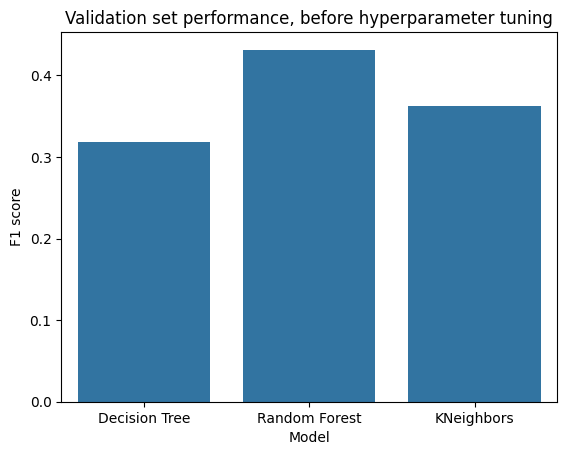

In [70]:
graph = sns.barplot(data=score_comparison, x='Model', y='Validation Set Scores (before tuning)');
graph.set_title('Validation set performance, before hyperparameter tuning');
graph.set_ylabel('F1 score');

Figure 2

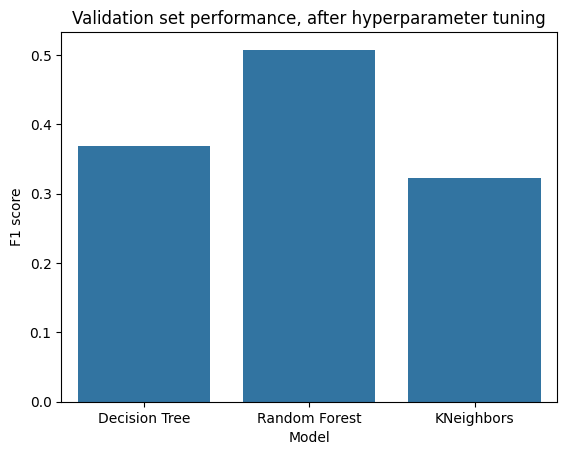

In [73]:
graph = sns.barplot(data=score_comparison, x='Model', y='Validation Set Scores (after tuning)');
graph.set_title('Validation set performance, after hyperparameter tuning');
graph.set_ylabel('F1 score');

Figure 3

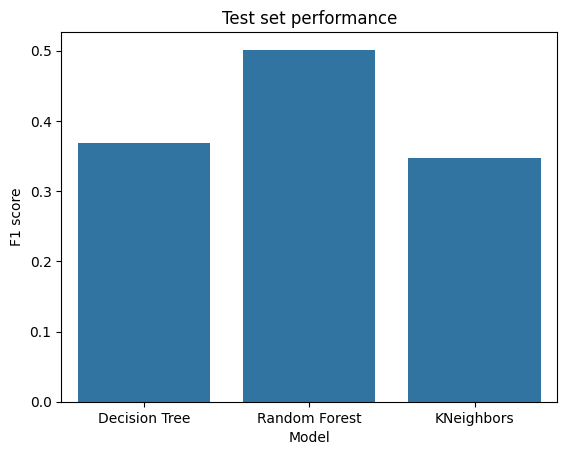

In [74]:
graph = sns.barplot(data=score_comparison, x='Model', y='Test Set Scores');
graph.set_title('Test set performance');
graph.set_ylabel('F1 score');

Figure 4

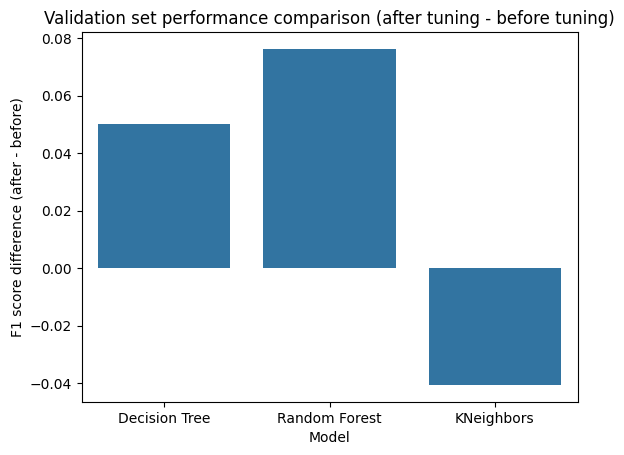

In [78]:
graph = sns.barplot(data=score_comparison, x='Model', y=(score_comparison['Validation Set Scores (after tuning)'] - score_comparison['Validation Set Scores (before tuning)']));
graph.set_title('Validation set performance comparison (after tuning - before tuning)');
graph.set_ylabel('F1 score difference (after - before)');

Figure 5

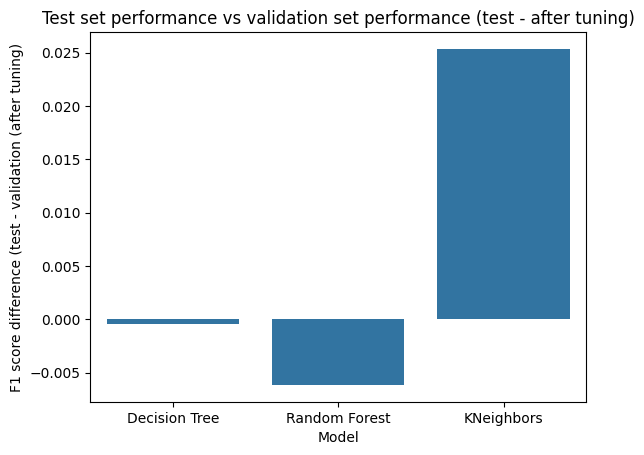

In [83]:
graph = sns.barplot(data=score_comparison, x='Model',
y=(score_comparison['Test Set Scores'] - score_comparison['Validation Set Scores (after tuning)']));
graph.set_title('Test set performance vs validation set performance (test - after tuning)');
graph.set_ylabel('F1 score difference (test - validation (after tuning)');

Figure 6

## Conclusion

Based on assessing each model's performance, I would select the random forest model for deploying the model to production.

Figures 2 thru 4 show that the random forest model was the best performing model compared to the other two models as it had a higher F1 score compared to the other models.
However, in Figure 6, the random forest model did slightly overfit when compared to the other models, although not by a dramatic amount when compared to the K-neighbors model.